In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sks
import numpy as np

In [2]:
train_data_file = "Resources/19332020Main.csv"
test_data_file = "Resources/2021Players.csv"


train_df = pd.read_csv(train_data_file, encoding='ISO-8859-1')
test_df = pd.read_csv(test_data_file, encoding='ISO-8859-1')


In [3]:
test_df.head()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,1,Whit Merrifield,664,2021,32,KCR,AL,162,720,97,...,12,12,40,4,0.277,0.317,0.395,0.711,*49/7D,1
1,2,Marcus Semien,652,2021,30,TOR,AL,162,724,115,...,3,9,15,1,0.265,0.334,0.538,0.873,*46/D,1
2,3,Bo Bichette,640,2021,23,TOR,AL,159,690,121,...,4,10,25,1,0.298,0.344,0.484,0.828,*6D,1
3,4,Ozzie Albies,629,2021,24,ATL,NL,156,686,103,...,7,4,20,4,0.259,0.311,0.488,0.799,*4,1
4,5,Jonathan Schoop,623,2021,29,DET,AL,156,674,85,...,8,15,2,0,0.278,0.321,0.435,0.756,*34D/5,1


In [4]:
train_df.head()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,1,Juan Soto,154,2020,21,WSN,NL,47,196,39,...,0.0,1.0,6,2,0.351,0.490,0.695,1.185,*7/9D,1
1,2,Nelson Cruz,185,2020,39,MIN,AL,53,214,33,...,0.0,8.0,0,0,0.303,0.397,0.595,0.992,*D/H,1
2,3,DJ LeMahieu,195,2020,31,NYY,AL,50,216,41,...,1.0,3.0,3,0,0.364,0.421,0.590,1.011,*435/HD,1
3,4,Mike Trout,199,2020,28,LAA,AL,53,241,41,...,4.0,1.0,1,1,0.281,0.390,0.603,0.993,*8/D,1
4,5,Freddie Freeman,214,2020,30,ATL,NL,60,262,51,...,0.0,6.0,2,0,0.341,0.462,0.640,1.102,*3/HD,1


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        533 non-null    int64  
 1   Player    533 non-null    object 
 2   AB        533 non-null    int64  
 3   Year      533 non-null    int64  
 4   Age       533 non-null    int64  
 5   Tm        533 non-null    object 
 6   Lg        533 non-null    object 
 7   G         533 non-null    int64  
 8   PA        533 non-null    int64  
 9   R         533 non-null    int64  
 10  H         533 non-null    int64  
 11  2B        533 non-null    int64  
 12  3B        533 non-null    int64  
 13  HR        533 non-null    int64  
 14  RBI       533 non-null    int64  
 15  BB        533 non-null    int64  
 16  IBB       533 non-null    int64  
 17  SO        533 non-null    int64  
 18  HBP       533 non-null    int64  
 19  SH        533 non-null    int64  
 20  SF        533 non-null    int64 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        3254 non-null   int64  
 1   Player    3254 non-null   object 
 2   AB        3254 non-null   int64  
 3   Year      3254 non-null   int64  
 4   Age       3254 non-null   int64  
 5   Tm        3254 non-null   object 
 6   Lg        3254 non-null   object 
 7   G         3254 non-null   int64  
 8   PA        3254 non-null   int64  
 9   R         3254 non-null   int64  
 10  H         3254 non-null   int64  
 11  2B        3254 non-null   int64  
 12  3B        3254 non-null   int64  
 13  HR        3254 non-null   int64  
 14  RBI       3254 non-null   int64  
 15  BB        3254 non-null   int64  
 16  IBB       3254 non-null   int64  
 17  SO        3254 non-null   int64  
 18  HBP       3254 non-null   int64  
 19  SH        3254 non-null   int64  
 20  SF        2589 non-null   floa

In [7]:
#Fill all the emapty values with 0
train_df = train_df.fillna(value=0)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        3254 non-null   int64  
 1   Player    3254 non-null   object 
 2   AB        3254 non-null   int64  
 3   Year      3254 non-null   int64  
 4   Age       3254 non-null   int64  
 5   Tm        3254 non-null   object 
 6   Lg        3254 non-null   object 
 7   G         3254 non-null   int64  
 8   PA        3254 non-null   int64  
 9   R         3254 non-null   int64  
 10  H         3254 non-null   int64  
 11  2B        3254 non-null   int64  
 12  3B        3254 non-null   int64  
 13  HR        3254 non-null   int64  
 14  RBI       3254 non-null   int64  
 15  BB        3254 non-null   int64  
 16  IBB       3254 non-null   int64  
 17  SO        3254 non-null   int64  
 18  HBP       3254 non-null   int64  
 19  SH        3254 non-null   int64  
 20  SF        3254 non-null   floa

In [9]:
#Check to see if there any NaN values
train_df.isna()

,Rk,Player,AB,Year,Age,Tm,Lg,G,PA,R,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#drop the name player column from the test dataset
test_df.drop("Player", axis = 1, inplace=True)


In [11]:
test_df.head()

,Rk,AB,Year,Age,Tm,Lg,G,PA,R,H,...,SF,GDP,SB,CS,BA,OBP,SLG,OPS,Pos,All Star
0,1,664,2021,32,KCR,AL,162,720,97,184,...,12,12,40,4,0.277,0.317,0.395,0.711,*49/7D,1
1,2,652,2021,30,TOR,AL,162,724,115,173,...,3,9,15,1,0.265,0.334,0.538,0.873,*46/D,1
2,3,640,2021,23,TOR,AL,159,690,121,191,...,4,10,25,1,0.298,0.344,0.484,0.828,*6D,1
3,4,629,2021,24,ATL,NL,156,686,103,163,...,7,4,20,4,0.259,0.311,0.488,0.799,*4,1
4,5,623,2021,29,DET,AL,156,674,85,173,...,8,15,2,0,0.278,0.321,0.435,0.756,*34D/5,1


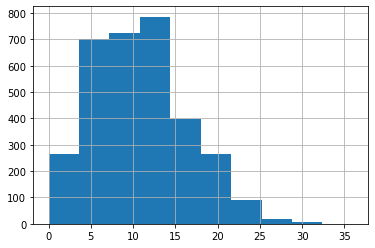

In [41]:
#drop the name player column from the train dataset
#train_df.drop("Player", axis = 1, inplace=True)

#train_df.head()
train_df["GDP"].hist()

In [13]:
#Rename the All Star column to Classification in both test and train dataset
train_df.rename(columns={"All Star":"Classification"}, inplace=True)
test_df.rename(columns={"All Star":"Classification"}, inplace=True)
print(train_df.columns)
print(test_df.columns)

Index(['Rk', 'AB', 'Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS',
       'BA', 'OBP', 'SLG', 'OPS', 'Pos', 'Classification'],
      dtype='object')
Index(['Rk', 'AB', 'Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS',
       'BA', 'OBP', 'SLG', 'OPS', 'Pos', 'Classification'],
      dtype='object')


In [14]:
train_df.drop(columns=["Tm", "Pos", "Lg"], axis = 1, inplace=True)

In [15]:
test_df.drop(columns=["Tm", "Pos", "Lg"], axis = 1, inplace=True)

In [16]:
print(train_df.columns)
print(test_df.columns)

Index(['Rk', 'AB', 'Year', 'Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP',
       'SLG', 'OPS', 'Classification'],
      dtype='object')
Index(['Rk', 'AB', 'Year', 'Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP',
       'SLG', 'OPS', 'Classification'],
      dtype='object')


In [44]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    #print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    #print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')

    print(f'Train score: {roc_auc_score(y_train, reg.predict_proba(X_train_scaled)[:,1])}')
    print(f'Test Score: {roc_auc_score(y_test, reg.predict_proba(X_test_scaled)[:,1])}\n')                   
    print(f'Classification Score: {classification_report(y_test, reg.predict(X_test_scaled))}\n')
    plt.show() 

In [45]:
X_train = train_df.drop(columns = ['Classification'])
y_train = train_df['Classification']

X_test = test_df.drop(columns = ['Classification'])
y_test = test_df['Classification']
print(X_train.columns)
print(X_test.columns)

Index(['Rk', 'AB', 'Year', 'Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP',
       'SLG', 'OPS'],
      dtype='object')
Index(['Rk', 'AB', 'Year', 'Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP',
       'SLG', 'OPS'],
      dtype='object')


In [46]:
#data = [X_train, X_test, y_train, y_test]
y_train.value_counts()

0    1800
1    1454
Name: Classification, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler()
#test_scaler = StandardScaler()
train_scaler = train_scaler.fit(X_train)

X_train_scaled = train_scaler.transform(X_train)
X_test_scaled = train_scaler.transform(X_test)
scaled_data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [48]:
X_train_scaled
y_train

0       1
1       1
2       1
3       1
4       1
       ..
3249    0
3250    0
3251    0
3252    0
3253    0
Name: Classification, Length: 3254, dtype: int64

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVR   

In [50]:
#test_model(LinearRegression(), scaled_data)
test_model(RandomForestClassifier(), scaled_data)
test_model(LogisticRegression(), scaled_data)
#test_model(ExtraTreesRegressor(), scaled_data)
#test_model(AdaBoostRegressor(), scaled_data)
#test_model(SVR(C=1.0, epsilon=0.2), scaled_data)
#test_model(KNeighborsRegressor(), scaled_data)

test_model(AdaBoostClassifier(), scaled_data)

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.7487206266318537

Classification Score:               precision    recall  f1-score   support

           0       0.77      0.93      0.84       383
           1       0.60      0.27      0.38       150

    accuracy                           0.74       533
   macro avg       0.68      0.60      0.61       533
weighted avg       0.72      0.74      0.71       533


Model: LogisticRegression
Train score: 0.8054875439400887
Test Score: 0.6978938207136641

Classification Score:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       383
           1       0.51      0.46      0.49       150

    accuracy                           0.73       533
   macro avg       0.66      0.65      0.65       533
weighted avg       0.72      0.73      0.72       533




/Users/b77077/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: AdaBoostClassifier
Train score: 0.97281484028733
Test Score: 0.840574412532637

Classification Score:               precision    recall  f1-score   support

           0       0.86      0.85      0.86       383
           1       0.64      0.65      0.64       150

    accuracy                           0.80       533
   macro avg       0.75      0.75      0.75       533
weighted avg       0.80      0.80      0.80       533




In [31]:
#roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
sks.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params_grid = {'criterion' : ['gini','entropy'],
               'max_depth': [3,6,8,15],
               'max_leaf_nodes':[2,10,20,40,100],
               'max_features':['auto','log2'],
               'max_samples':[0.1,0.4,0.8,1],
               'min_samples_leaf': [5,50,100,200,400,1000],
               'min_samples_split': [5,10,100,1000,2000,3000],
               'n_estimators': [10,50,100,500]}

rf_grid_new = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                                 params_grid, n_iter= 400,  cv = 3, verbose=2, n_jobs = -1,
                                 scoring='roc_auc', return_train_score=True)

search = rf_grid_new.fit(X_train_scaled, y_train)
search.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.3min finished


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_samples': 0.8,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'gini'}

In [33]:
probability_scores = rf_grid_new.best_estimator_.predict_proba(X_test_scaled)[:,1]

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, probability_scores)

0.6275369886858138

In [35]:

lr = LogisticRegression(n_jobs=-1, random_state=42)

grid_values = {'penalty': ['l1','none', 'l2'], 'C': [0.001,0.01,0.1,1,10,100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model_lr = GridSearchCV(lr, param_grid=grid_values, 
                        cv = 2, verbose=3, n_jobs = -1, 
                        scoring='roc_auc',
                        return_train_score=True)

search = model_lr.fit(X_train_scaled, y_train)
search.best_params_

Fitting 2 folds for each of 90 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 157 out of 180 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.3s finished
/Users/b77077/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [36]:
probability_scores_lr = model_lr.best_estimator_.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test, probability_scores_lr)

0.666231505657093

In [72]:

scaled_df = pd.DataFrame(X_test_scaled)
#scaled_df.head(1)

probability_scores_ind = model_lr.best_estimator_.predict_proba(scaled_df.iloc[:1,:])[:,1]
probability_scores_ind

array([0.61254184])

In [74]:
X_test_scaled[0]
pd.Series(np.array(X_test_scaled[0]))

scaled_df = pd.DataFrame(X_test_scaled)
print(scaled_df.head(1))
scaled_df.iloc[:1,:]


         0         1        2         3         4         5         6   \
0 -1.731519  1.485588  1.51905  1.119935  1.027453  1.276509  0.910083   

         7         8         9   ...        15        16        17       18  \
0  1.118273  1.718273 -0.355008  ...  0.088748 -0.843765  2.966876  0.23546   

         19        20        21        22        23        24  
0  2.293197 -0.206791 -0.147654 -0.850056 -0.575215 -0.721135  

[1 rows x 25 columns]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.731519,1.485588,1.51905,1.119935,1.027453,1.276509,0.910083,1.118273,1.718273,-0.355008,...,0.088748,-0.843765,2.966876,0.23546,2.293197,-0.206791,-0.147654,-0.850056,-0.575215,-0.721135


In [ ]:
#import pickle
#with open('lr.pkl', 'wb') as model:
#    pickle.dump(lr, model)
#with open('lr.pkl','rb') as model:
#    lr = pickle.load(model)
#https://github.com/ronaldpacheco/Model_Deployment